In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc

In [3]:
#import data
X_train, Y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

print(X_train[:5], "\n\n", Y_train[:5])

[[1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]
 [1.314e+03 2.000e+00 1.000e+00 1.400e+01]] 

 [300.  509.8 394.  540.  415. ]


In [4]:
#Normalizing data myself
My_X_norm= (X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
print(My_X_norm[:5])
print()

#Normalizing using Sklearn StandardScaler()
scaler= StandardScaler()
X_norm= scaler.fit_transform(X_train)
print(X_norm[:5])
print()

#Both are equal
print(f"StandardScaler().fit_transform() is same as (X-mu)/sigma: {(My_X_norm==X_norm).all()}")

[[-0.42363245  0.43380884 -0.78927234  0.99372644]
 [ 1.2842716   0.43380884  1.2669898  -0.82954214]
 [ 0.74493348  0.43380884  1.2669898   0.14028157]
 [ 1.31342501  0.43380884  1.2669898  -0.90712804]
 [-0.25357088 -1.10001528 -0.78927234 -0.94592099]]

[[-0.42363245  0.43380884 -0.78927234  0.99372644]
 [ 1.2842716   0.43380884  1.2669898  -0.82954214]
 [ 0.74493348  0.43380884  1.2669898   0.14028157]
 [ 1.31342501  0.43380884  1.2669898  -0.90712804]
 [-0.25357088 -1.10001528 -0.78927234 -0.94592099]]

StandardScaler().fit_transform() is same as (X-mu)/sigma: True


In [5]:
#SGDRegressor stands for Stochastic Gradient Descent Regressor
#It is a more advanced gradient descent algo where the learning rate is decreased with successive iterations.

sgdr=SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, Y_train)

print(sgdr)
print()
print(f"Number of iterations performed before reaching stopping criteria: {sgdr.n_iter_}")
print(f"coefficient array w={sgdr.coef_}")
print(f" intercept value  b={sgdr.intercept_}")
print()
print(f"Number of weight updates= 1+(n_iter_*n_samples) = {sgdr.t_} = {1+(sgdr.n_iter_)*len(X_norm)}")

SGDRegressor()

Number of iterations performed before reaching stopping criteria: 121
coefficient array w=[110.07898685 -21.01836455 -32.4306312  -38.05823301]
 intercept value  b=[363.16789746]

Number of weight updates= 1+(n_iter_*n_samples) = 11980.0 = 11980


w,b found by gradient descent: (alpha & normalization notebook)
                  w= [110.56039756 -21.26715096 -32.70718139 -37.97015909], 
                  b= 363.16 

values are similar here, but the number of iterations required is significantly less.

In [6]:
w=sgdr.coef_
b=sgdr.intercept_

In [7]:
#prediction by model
prediction=sgdr.predict(X_norm)

#self prediction
f_wb= b+np.dot(X_norm,w)

print("Actual =", Y_train[:5])
print("Model  =", prediction[:5])
print("f_wb   =", f_wb[:5])
print(f"sgdr.predict() is same as f_wb: {(f_wb==prediction).all()}")

Actual = [300.  509.8 394.  540.  415. ]
Model  = [295.19404182 485.9028909  389.62332003 492.0648511  419.97227536]
f_wb   = [295.19404182 485.9028909  389.62332003 492.0648511  419.97227536]
sgdr.predict() is same as f_wb: True


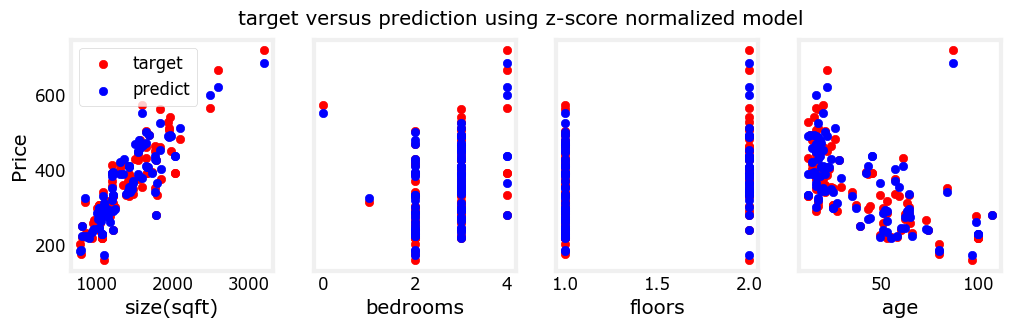

In [8]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], Y_train, color='red', label='target')
    ax[i].scatter(X_train[:,i], prediction,color='blue', label = 'predict')
    ax[i].set_xlabel(X_features[i])
    
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()